In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#generate input
n = 100
x = np.random.uniform(100-0.5*10**(-5), 100+0.5*10**(-5), n)

In [4]:
def standard_calc(x):
    return np.mean(x), np.std(x), np.var(x)

In [5]:
def algorithm1(x):
    n = x.size
    mu = 0
    sigma = 0
    for i in range(n):
        mu += x[i]/n
    for i in range(n):
        sigma += (x[i]-mu)**2/n 
    std = np.sqrt(sigma)
    return mu, std, sigma

In [28]:
def algorithm2(x):
    n = x.size
    x2 = 0
    mu = 0
    for i in range(n):
        mu += x[i]/n
        x2 += (x[i])**2
#     print(x2/n)
#     print(mu**2)
    sigma = x2/n - mu**2
#     print(sigma)
    std = np.sqrt(sigma)
    return mu, std, sigma

In [42]:
def welfords_method(x):
    n = x.size
    mu = 0
    sigma = 0
    for k in range(n):
        old_mu = mu
        mu += (x[k]-mu)/(k+1)
        sigma += (x[k]-mu)*(x[k]-old_mu)
    sigma /= n
    std = np.sqrt(sigma)
    return mu, std, sigma

In [43]:
np_mu, np_std, np_sigma = standard_calc(x)
print(np_mu, np_std, np_sigma)

100.00000036341673 2.6898629104198495e-06 7.235362476852343e-12


In [44]:
mu1, std1, sigma1 = algorithm1(x)
print(mu1, std1, sigma1)

100.00000036341673 2.6898629104198495e-06 7.235362476852343e-12


In [45]:
mu2, std2, sigma2 = algorithm2(x)
print(mu2, std2, sigma2)

100.00000036341673 3.5683225505580343e-06 1.2732925824820995e-11


In [46]:
mu3, std3, sigma3 = welfords_method(x)
print(mu3, std3, sigma3)

100.00000036341676 2.6898629095007645e-06 7.235362471907918e-12


#### how does result change with increasing number of samples

In [30]:
n_N = 11
N = 10**(np.linspace(0, 5, n_N))
mus = np.empty((4,n_N))
stds = np.empty((4,n_N))
sigmas = np.empty((4,n_N))
for i in range(n_N):
    X = np.random.uniform(100-0.5*10**(-5), 100+0.5*10**(-5), int(N[i]))
    mus[0,i], stds[0,i], sigmas[0,i] = standard_calc(X)
    mus[1,i], stds[1,i], sigmas[1,i] = algorithm1(X)
    mus[2,i], stds[2,i], sigmas[2,i] = algorithm2(X)
    mus[3,i], stds[3,i], sigmas[3,i] = welfords_method(X)

/Users/ekaterinamaksimova/Programs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in sqrt
  if sys.path[0] == '':


In [31]:
labels = ['numpy','algorithm 1','algorithm 2', "welford's method"]
ms = ['x','d', 'o','+']

Text(0.5, 0, 'N, number of samples')

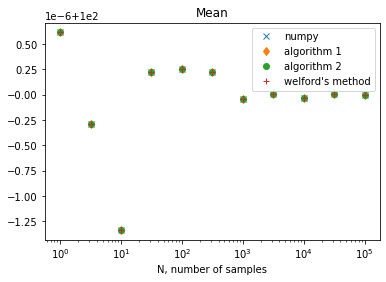

In [32]:
for i in range(4):
    plt.plot(N, mus[i], ms[i],label = labels[i])
plt.legend()
plt.xscale('log')
plt.title('Mean')
plt.xlabel('N, number of samples')

Text(0.5, 0, 'N, number of samples')

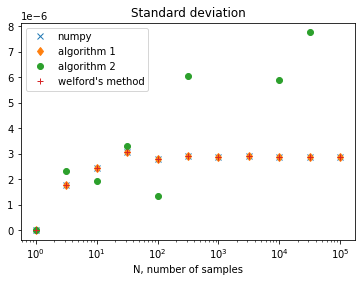

In [33]:
for i in range(4):
    plt.plot(N, stds[i], ms[i], label = labels[i])
plt.legend()
plt.xscale('log')
plt.title('Standard deviation')
plt.xlabel('N, number of samples')

Text(0.5, 0, 'N, number of samples')

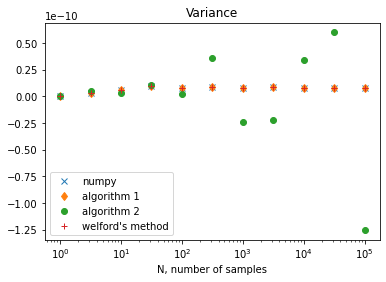

In [34]:
for i in range(4):
    plt.plot(N,sigmas[i], ms[i],label = labels[i])
plt.legend()
plt.xscale('log')
plt.title('Variance')
plt.xlabel('N, number of samples')